# CSE327 Homework3


**Due date: 23:59 on April 10, 2022 EST (Sunday)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*

## Description
---
In this homework you will work on perspective projection and using SIFT features for scene stitching. There are 3 problems in this homework with a total of ***100 points (plus 10 Bonus points)***. Be sure to read **Submission Guidelines** below. They are important.


## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

**We strongly recommend you to use SIFT methods in Colab for this homework**, the details will be described in the next section.

However, if you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 3.4.3. If we use SIFT method directly, typically we will get this error message:

```
error: OpenCV(3.4.3) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

```

One simple way to use the OpenCV in-built function `SIFT` in Colab is to switch the version to the one from 'contrib'. Below is an example of switching OpenCV version:

1. Run the following command in one section in Colab, which has already been included in this assignment:
```
pip install opencv-contrib-python==3.4.2.17
```
2. Restart runtime by
```
Runtime -> Restart Runtime
```

Then you should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [1]:
# pip install the OpenCV version from 'contrib'
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 91 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
# import packages here
import cv2
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version

3.4.2


In [3]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Set your working directory (in your google drive)
#   change it to your specific homework directory.
%cd 'gdrive/My Drive/CSE327/CSE327-HW3-Spring22/'
%ls

/content/gdrive/My Drive/CSE327/CSE327-HW3-Spring22
CSE327_HW3_Spring22.ipynb  SourceImages/


## Problem 1: Pinhole camera model
{30 points} The figure below shows a typical pinhole camera model. We construct a camera frame of reference centered at the focal point of the camera with the z axis along the principal optical axis of the device. The focal length of this camera, f, is 8mm, the CCD sensor on the focal plane is 4mm wide and 3mm tall as shown. The sensor is divided into a grid of 800 pixels in the x direction and 600pixels in the y direction. The center of the imaging array corresponds to the point where the optical axis cuts the focal plane. The pixel coordinates are indexed from the bottom right hand corner as shown (Attention on the axes directions).

![alt text](https://drive.google.com/uc?id=1JTRIWXjEj0v9x1vT_HuLMf_3XuZrltZ2)

- **Step 1 (5pt)**. Compute the matrix of intrinsic parameters which relates the coordinates of features given with respect to the camera frame to the pixel coordinates of the projection of that point on the sensor. That is give an A such that: 

![alt text](https://drive.google.com/uc?id=1k3XOPWSi0vDMNMmo12UAbwN643nglkJZ)

######## Your answer here ########
A = [[1600, 0, 400, 0],
     [0, 1600, 300, 0],
     [0, 0, 1, 0]]


- **Step 2 (10pt)**. Consider a wireframe cube 2 meters on side that is initially centered and axis-aligned with the cameras frame of reference; that is, initially the frame of reference of the cube and the frame of reference of the camera are initially coincident. Now consider what would happen if we first rotated the cube about the axis (3,4,-1) by 60 degrees then translated it by +10 meters along the z-axis (remember to normalize the axis to unit length).

> (i) Use a numpy array to represent the 4x4 matrix of extrinsic parameters which corresponds to the transformation from the blocks new frame of reference to the camera frame. Use the **axis/angle representation** for rotation (remember to include translation). Refer to section 2.1.4 in Szeliski for more details.

In [5]:
######## Your code here ##########

def transformation(rot_axis, rot_angle, translation):


  #calculate the 4x4 matrix using axis/angle representation
  rot_axis = np.asarray(rot_axis)
  rot_axis = rot_axis/np.linalg.norm(rot_axis)
  e1 = rot_axis[0]
  e2 = rot_axis[1]
  e3 = rot_axis[2]
  ang = math.radians(rot_angle)
  ang_factor = 1 - math.cos(ang)
  ext_mat = [[ang_factor*e1*e1 + math.cos(ang), ang_factor*e1*e2 - e3*math.sin(ang), ang_factor*e1*e3 + e2*math.sin(ang), translation[0]],
             [ang_factor*e2*e1 + e3*math.sin(ang), ang_factor*e2*e2 + math.cos(ang), ang_factor*e2*e3 - e1*math.sin(ang), translation[1]],
             [ang_factor*e3*e1 - e2*math.sin(ang), ang_factor*e3*e2 + e1*math.sin(ang), ang_factor*e3*e3 + math.cos(ang), translation[2]],
             [0,0,0,1]]
  return ext_mat

print(transformation([3,4,-1], 60, [0,0,10]))

[[0.6730769230769231, 0.40061078589092014, 0.6216739127944497, 0], [0.06092767564754137, 0.8076923076923077, -0.586447742288145, 0], [-0.7370585281790651, 0.4326015884419912, 0.5192307692307694, 10], [0, 0, 0, 1]]


> (ii) Use a numpy array to represent the 4x4 matrix of extrinsic parameters which corresponds to the transformation from the blocks new frame of reference to the camera frame. Use the **quaternion representation** for rotation. Verify that you get the same result in (i) and (ii). The quaternion definition based on the axis/angle representation is given below. Refer to section 2.1.4 in Szeliski for more details.

![alt text](https://drive.google.com/uc?id=1AVOISoyBlWK_B4SuV42Xw_rZMcE35Njm)

In [6]:
######## Your code here ##########

def transformation_quaternion(rot_axis, rot_angle, translation):

  #calculate the 4x4 matrix using the quaternion representation
  rot_axis = np.asarray(rot_axis)
  rot_axis = rot_axis/np.linalg.norm(rot_axis)
  cos_rot = math.cos(math.radians(rot_angle/2))
  sin_rot = math.sin(math.radians(rot_angle/2))
  qw = cos_rot
  qx = rot_axis[0]*sin_rot
  qy = rot_axis[1]*sin_rot
  qz = rot_axis[2]*sin_rot
  #print("A11 should be: ", str(1 - 2*qy*qy - 2*qz*qz))
  ext_mat_quaternion = [[1 - 2*qy*qy - 2*qz*qz, 2*qx*qy - 2*qz*qw, 2*qx*qz + 2*qy*qw, translation[0]], 
                        [2*qx*qy + 2*qz*qw, 1 - 2*qx*qx - 2*qz*qz, 2*qy*qz - 2*qx*qw, translation[1]],
                        [2*qx*qz - 2*qy*qw, 2*qy*qz + 2*qx*qw, 1 - 2*qx*qx - 2*qy*qy, translation[2]], 
                        [0,0,0,1]]
  return ext_mat_quaternion

print(transformation_quaternion([3,4,-1], 60, [0,0,10]))


[[0.673076923076923, 0.4006107858909201, 0.6216739127944497, 0], [0.06092767564754137, 0.8076923076923077, -0.5864477422881449, 0], [-0.7370585281790651, 0.4326015884419911, 0.5192307692307694, 10], [0, 0, 0, 1]]


- **Step 3 (10pt)**. Use your answers above to compute where the vertices of the cube would appear on the image in pixel coordinates. Plot these vertices using python and connect the vertices by line segments.

Number pixels:  8


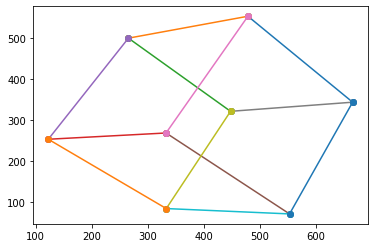

In [7]:
######## Your code here ##########

def get_pixel_coordinates(vertices, int_mat, ext_mat):

  # calculate where each vertex of the cube maps to, in pixel coordinates.
  vertices = np.asarray(vertices)
  int_mat = np.asarray(int_mat)
  ext_mat = np.asarray(ext_mat)
  vertices_pixel = []
  calib_mat = np.matmul(np.asarray(int_mat), np.asarray(ext_mat))
  for vertex in vertices:
    #vertex is a 1D array of size 3 = [x,y,z]
    vertex = np.append(vertex, [1])
    vertex = np.asarray(vertex)
    vertex.shape = 4, 1
    #print(vertex)
    #print(calib_mat)

    pixel = np.matmul(calib_mat, vertex)
    pixel.shape = 1, 3
    pixel = pixel[0]
    pixel_2d = np.asarray([pixel[0]/pixel[2], pixel[1]/pixel[2]])
    #print("Pixel coord is: ", pixel_2d)
    vertices_pixel.append(pixel_2d)
  return vertices_pixel


def draw_cube(vertices_pixel):
  for i in range(2, len(vertices_pixel)-3):
    #plt.scatter(vertex[0],vertex[1])
    vertex = vertices_pixel[i]
    if(i+1 <= len(vertices_pixel)-1):
      vertex2 = vertices_pixel[i+1]
      xx = [vertex[0], vertex2[0]]
      yy = [vertex[1], vertex2[1]]
      plt.plot(xx, yy, "-o")

  
  v1 = vertices_pixel[0]
  v2 = vertices_pixel[1]
  v3 = vertices_pixel[2]
  v4 = vertices_pixel[3]
  v5 = vertices_pixel[4]
  v6 = vertices_pixel[5]
  v7 = vertices_pixel[6]
  v8 = vertices_pixel[len(vertices_pixel) - 1]

  xx = [v8[0], v1[0]]
  yy = [v8[1], v1[1]]
  plt.plot(xx, yy, "-o")
  xx = [v1[0], v5[0]]
  yy = [v1[1], v5[1]]
  plt.plot(xx, yy, "-o")
  xx = [v8[0], v7[0]]
  yy = [v8[1], v7[1]]
  plt.plot(xx, yy, "-o")
  xx = [v8[0], v4[0]]
  yy = [v8[1], v4[1]]
  plt.plot(xx, yy, "-o")
  xx = [v3[0], v6[0]]
  yy = [v3[1], v6[1]]
  plt.plot(xx, yy, "-o")
  xx = [v6[0], v2[0]]
  yy = [v6[1], v2[1]]
  plt.plot(xx, yy, "-o")
  xx = [v2[0], v7[0]]
  yy = [v2[1], v7[1]]
  plt.plot(xx, yy, "-o")
  xx = [v7[0], v3[0]]
  yy = [v7[1], v3[1]]
  plt.plot(xx, yy, "-o")
  xx = [v1[0], v2[0]]
  yy = [v1[1], v2[1]]
  plt.plot(xx, yy, "-o")
  plt.show()
vertices = [[-1,-1,-1], [-1,-1,1], [1,1,1], [1,1,-1], [-1,1,-1], [-1,1,1], [1,-1,1], [1, -1, -1]] #cube length 2 centered at origin
int_mat = [[1600, 0, 400, 0],
           [0, 1600, 300, 0],
           [0, 0, 1, 0]]
ext_mat = transformation_quaternion([3,4,-1], 60, [0,0,10]) # +angle = ccw, -angle = cw
pixels = get_pixel_coordinates(vertices, int_mat, ext_mat)
print("Number pixels: ", len(pixels))
#print(pixels)
draw_cube(pixels)
#print(pixels)

- **Step 4 (5pt)**. Find out where the points at infinity corresponding to the x, y and z directions of the cube's new frame of reference would project onto the image (**hint:** extend parallel lines)

In [8]:
######## Your code here ##########

def get_vanishing_points(vertices_pixel):

  # calculate the vanishing points by extending parallel lines in x,y,z directions of cubes new frame of reference
  
  return vanishing_points

print("vanishing point in x:", )
print("vanishing point in y:", )
print("vanishing point in z:", )

vanishing point in x:
vanishing point in y:
vanishing point in z:


## Problem 2: Camera calibration

{30 points} A fixed camera views a table of variable height, illuminated by a projector that projects a cross-pattern onto the table. The system is to be calibrated by adjusting the height of the table to heights of precisely 50mm, 100mm, and 200mm. At each of these heights, the center of the cross-pattern is measured in images at the following positions (in pixels): (u, v) = (100, 250), (140, 340), and (200, 450), respectively. Notice that the projected ray of light has the same algebraic representation as the ray imaging to a camera. To simplify matters, choose a convenient world frame.

- **Step 1 (5pt)**. What are the (i) perspective projection camera model (i.e. the model that contains all the perspective projection parameters) and the (ii) projective camera model (i.e. the model that relates directly the point in 3D with its final projection in the image), specialized for this particular problem configuration? Give your answer as equations using homogeneous coordinates that show how a scene point is mapped to an image point.

######## Your answer here ########

(i): Projective Beam must be 1D projection onto the table
Equations:

[ku kv k]^T = [[p11, p12], [p21, p22], [p31, p32]]*[h,1]

Perspective Projection Params: p11, p12, p21, p22, p31, p32

(ii): Equations:

k (scale) = h*p31 + p32, we can set p32 = 1 

u = (h*p11 + p12)/(k) 

v = (h*p21 + p22)/(k)

Example: use h = 100 , (u,v) = (140,340)

k = 100*p31 + p32

140 = (100*p11 + p12)/(100*p31+p32)

340 = (100*p21 + p22)/(100*p31+p32)


- **Step 2 (5pt)**. In the projective camera model you defined in previous step, how many degrees of freedom are there in order to calibrate this system?

######## Your answer here ########

Degrees of freedom = 5

- **Step 3 (10pt)**. Compute all of the calibration parameters for this problem (use your projective camera model from the previous steps). (**hint** : Convert the problem to the form Ax=b where x is a column vector of all the unknowns, and use numpy arrays to solve for the linear least squares solution. Use the pseudo-inverse.)

In [9]:
######## Your code here ##########
from sympy import Matrix
def get_projective(heights, pixel_coordinates):

  # solving the system using pseudo-inverse, return the projective matrix
  A = []
  b = []
  # Ax = 0 causes ambiguity errors, SVD gave unexpected values
  '''
  for i in range(len(heights)):
    height = heights[i]
    pixel = pixel_coordinates[i]
    u = pixel[0]
    v = pixel[1]
    h = height
    A_u = [h, 1, 0, 0, -1*u*h, -1*u]
    A_v = [0, 0, h, 1, -1*v*h, -1*v]
    A.append(A_u)
    A.append(A_v)
    b.append(0)
    b.append(0)
  '''
  
  #If we allow p32 = 1, therefore scale = 1, scale = p31 + p32 = 1, therefore p31 = 0, p32 = 1
  for i in range(len(heights)):
    height = heights[i]
    pixel = pixel_coordinates[i]
    u = pixel[0]
    v = pixel[1]
    h = height
    A_u = [h, 1, 0, 0]
    A_v = [0, 0, h, 1]
    A.append(A_u)
    A.append(A_v)
    b.append(u)
    b.append(v)
  #print(A)
  A = np.asarray(A)
  b = np.asarray(b)

  x = np.linalg.lstsq(A,b, rcond = -1)
  projective_mat = x[0]
  return projective_mat

#print(projective_mat)
print(get_projective([50,100,200], [[100,250], [140,340], [200,450]]))

[  0.65714286  70.           1.3        195.        ]


- **Step 4 (10pt)**. Recover the height of the table when the cross is measured in three new images at the following pixel coordinates. Show how you obtained your answers as well.

General Method to Calculate Height using either u or v:

Using above formulas we can see that:

1. u = (h * p11 + p12) / (h * p31 + p32) , multiply both sides by h * p31 + p32 and expand

2. then: u * h * p31 + u * p32 = h * p11 + p12 , gather all h on one side, and all u on other side

3. then: u * h * p31 - h * p11 = p12 - u * p32 , factor out the h term on left side

4. then: h( u * p31 - p11) = p12 - u * p32, divide u * p31 - p11 on both sides

5. finally: h = (p12 - u * p32)/(u * p31 - p11)


> (i) (130, 310) = 91.30434782608695

> (ii) (170, 380) = 152.17391304347822

> (iii) (190, 300) = 182.60869565217388

In [10]:
######## Your code here ##########

def get_height(projective_mat, pixel_coordinates):

  # calculate height which corresponds to each pixel coordinate
  p_vals = projective_mat#get_projective([50,100,200], [[100,250], [140,340], [200,450]])
  p11 = p_vals[0]
  p12 = p_vals[1]
  p21 = p_vals[2]
  p22 = p_vals[3]
  p31 = 0
  p32 = 1

  u = pixel_coordinates[0]
  v = pixel_coordinates[1]
  height = (p12 - u*p32)/(p31*u - p11)
  return height

projective_mat = get_projective([50,100,200], [[100,250], [140,340], [200,450]])
print("height corresponding to (130, 310):", get_height(projective_mat, [130,310]))
print("height corresponding to (170, 380):", get_height(projective_mat, [170,380]))
print("height corresponding to (190, 300):", get_height(projective_mat, [190,300]))

height corresponding to (130, 310): 91.30434782608695
height corresponding to (170, 380): 152.17391304347822
height corresponding to (190, 300): 182.60869565217388


## Problem 3: Scene stitching with SIFT features
{40 points + 10 bonus} You will match and align between different views of a scene with SIFT features. 

Use `cv2.copyMakeBorder` function to pad the center image with zeros into a larger size. *Hint: the final output image should be of size 1608 × 1312.* Extract SIFT features for all images and go through the same procedures as you did in HW2 problem 1. Your goal is to find the affine transformation between the two images and then align one of your images to the other using `cv2.warpPerspective`. Use the `cv2.addWeighted` function to blend the aligned images and show the stitched result. Examples can be found at http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html.
Use parameters **0.5 and 0.5** for alpha blending.

- **Step 1 (15pt)**. Compute the transformation from the right image to the center image. Warp the right image with the computed transformation. Stitch the center and right images with alpha blending. Display the SIFT feature matching between the center and right images like you did in HW2 problem 1. Display the stitched result (center and right image).

- **Step 2 (15pt)** Compute the transformation from the left image to the stitched image from step 1. Warp the left image with the computed transformation. Stich the left and result images from step 1 with alpha blending. Display the SIFT feature matching between the result image from step 1 and the left image like what you did in HW2 problem 1. Display the final stitched result (all three images).

- **Step 3 (10pt)**. Instead of using `cv2.addWeighted` to do the blending, implement Laplacian Pyramids to blend the two aligned images. Tutorials can be found at http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html. Display the stitched result (center and right image) and the final stitched result (all three images) with laplacian blending instead of alpha blending.

- **Bonus (10pt)**. Follow the same steps as above for 3 images that you personally collect. These images should have some overlap between left-middle and middle-right. Refer to the provided 3 images in SourceImages folder for reference.

Note that for the resultant stitched image, some might have different intensity in the overlapping and other regions, namely the overlapping region looks brighter or darker than others. To get full credit, the final image should have uniform illumination.

Hints: You need to find the warping matrix between images with the same mechanism from HW2 problem 1. You will need as many reliable matches as possible to find a good homography so DO NOT use 0.1 here. A suggested value would be 0.75 in this case.

When you warp the image with cv2.warpPerspective, an important trick is to pass in the correct parameters so that the warped image has the same size with the padded_center image. Once you have two images with the same size, find the overlapping part and do the blending.

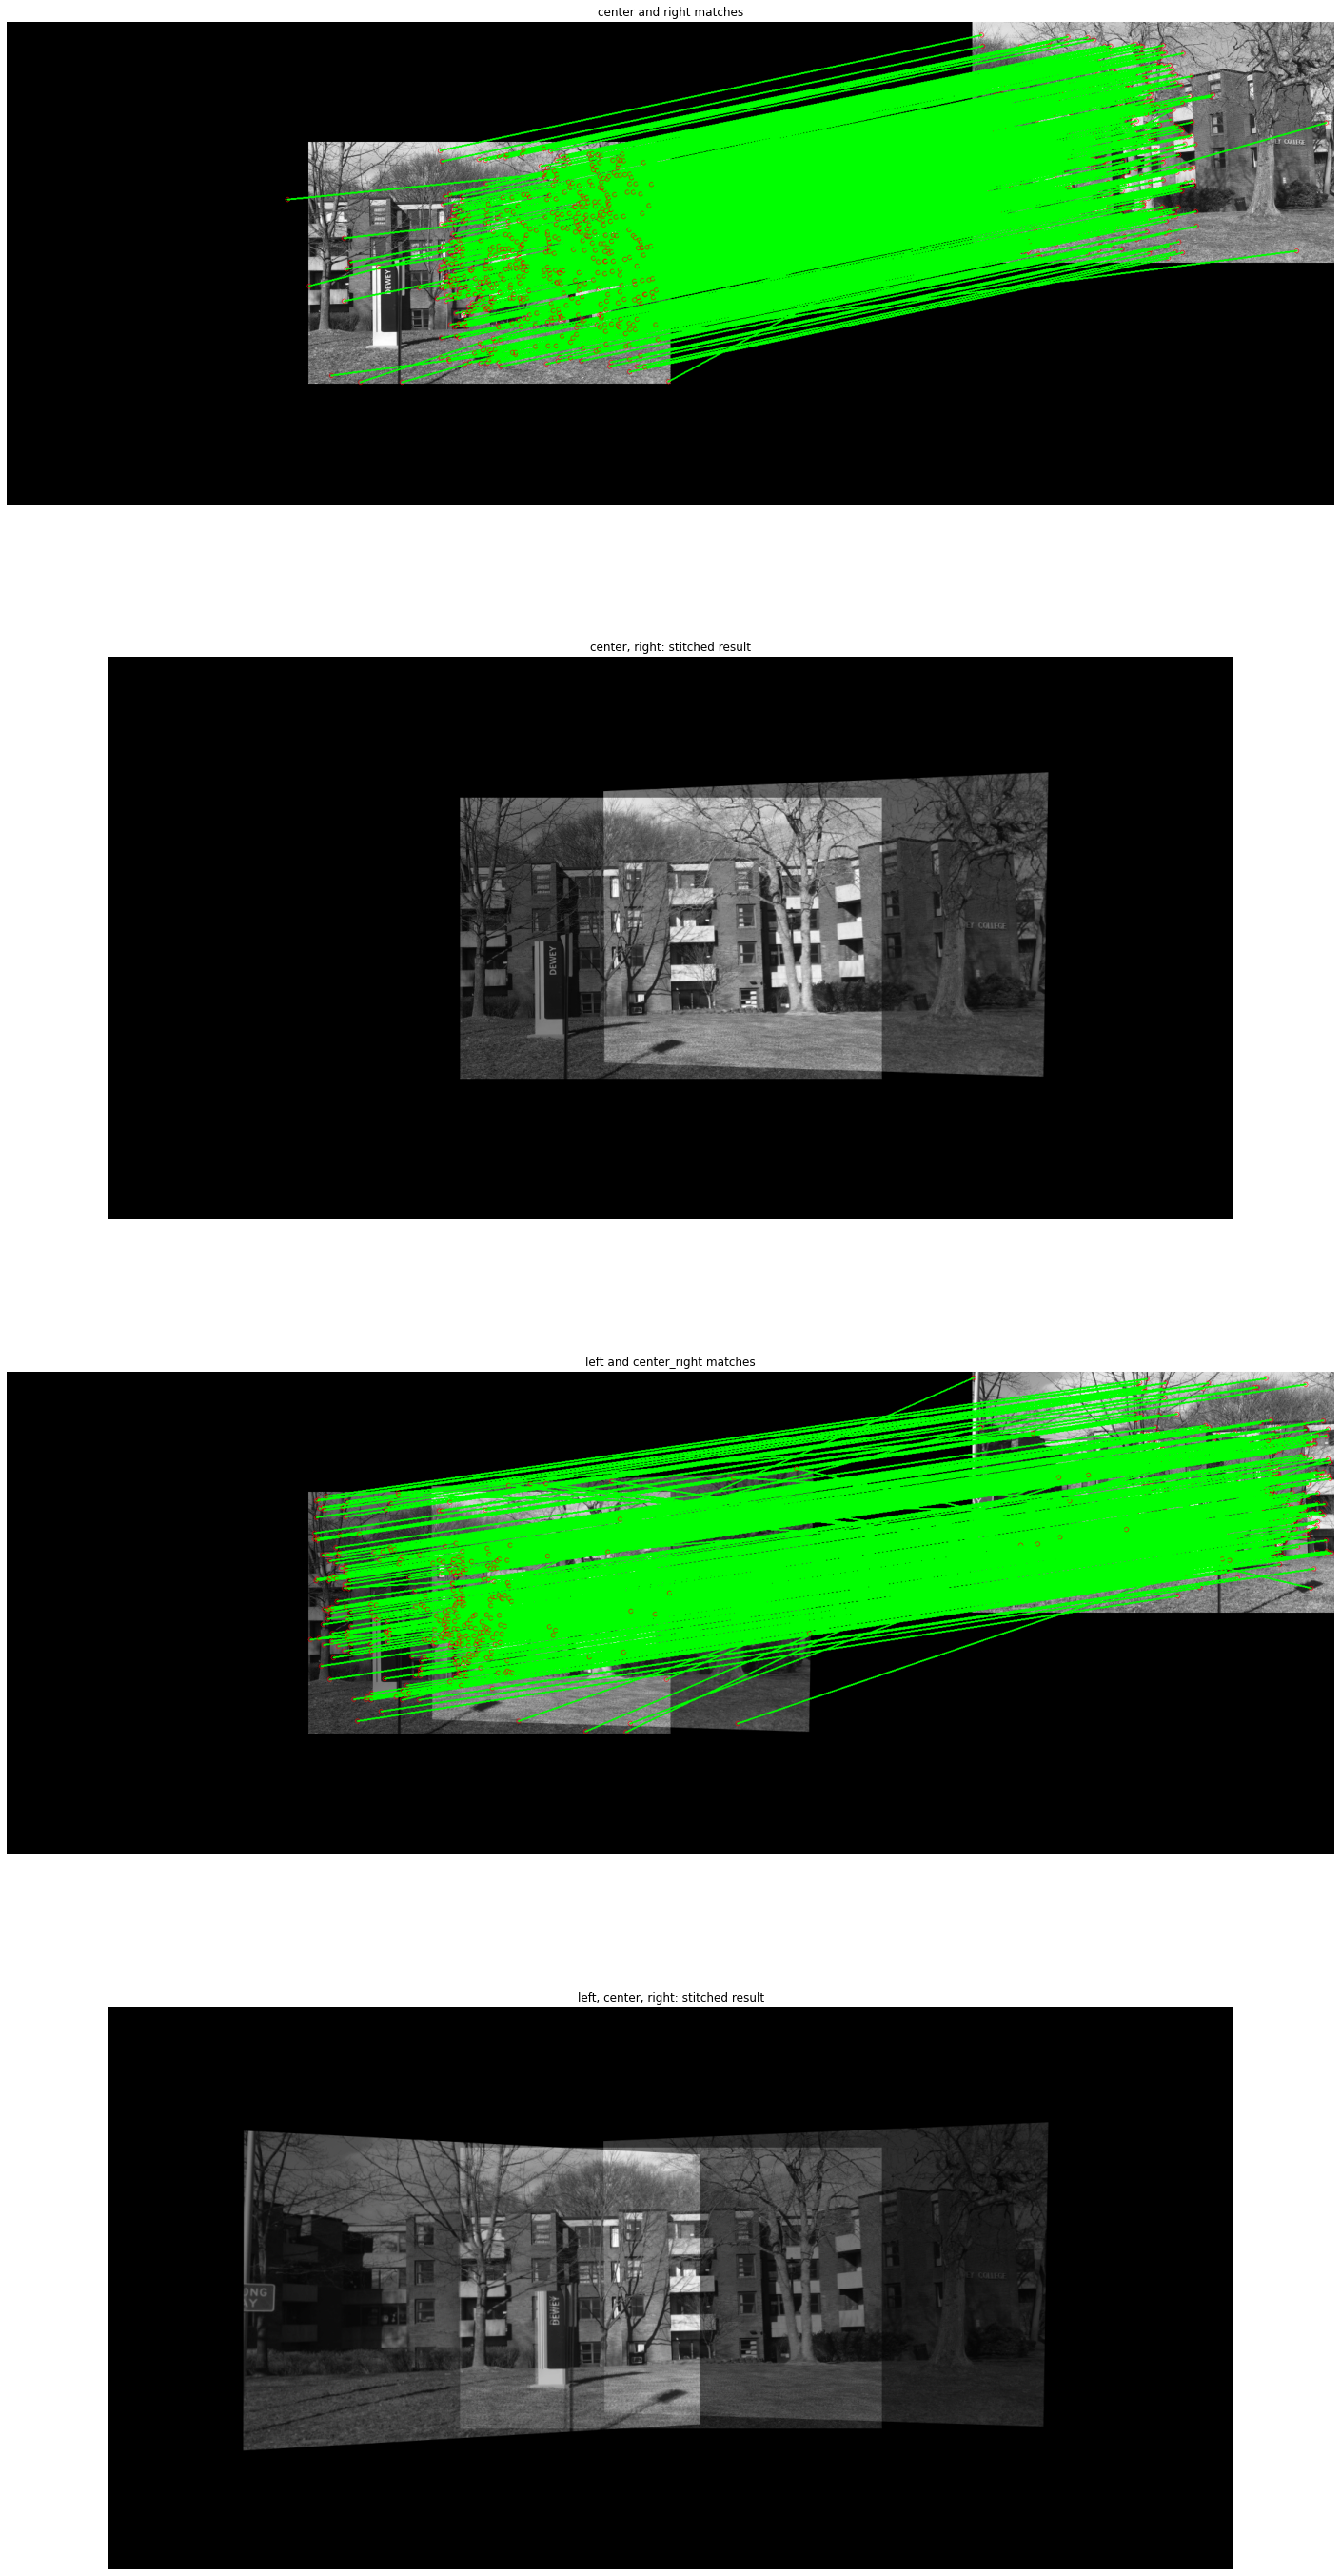

'\nplt.figure(figsize=(25,50))\nplt.subplot(2, 1, 1)\nplt.imshow(stitched_cr_lap, cmap=\'gray\')\nplt.title("Bonus, center, right: stitched result")\nplt.axis(\'off\')\nplt.subplot(2, 1, 2)\nplt.imshow(stitched_res_lap, cmap=\'gray\')\nplt.title("Bonus, left, center, right: stitched result")\nplt.axis(\'off\')\n'

In [32]:
imgCenter = cv2.imread('SourceImages/stitch_m.jpg', 0)
imgRight  = cv2.imread('SourceImages/stitch_r.jpg', 0)
imgLeft   = cv2.imread('SourceImages/stitch_l.jpg', 0)
mask   = cv2.imread('SourceImages/mask.jpeg', 0)
# initalize the stitched image as the center image
imgCenter = cv2.copyMakeBorder(imgCenter,200,200,500,500,cv2.BORDER_CONSTANT)

def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)

    # Also return the image if you'd like a copy
    return out

# blend two images
def alpha_blend(img, warped):
    # Implement alpha_blending
    alpha = .5
    return cv2.addWeighted(img,alpha,warped,1-alpha,0)

def gaussian_pyr(img, num_levels): #recheck this
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr

def laplace_pyr(g_pyr, num_levels): #recheck this
    num_levels = len(g_pyr)-1
    lap_top = g_pyr[-1]
    lap_pyr = [lap_top]
    for i in range(num_levels,0,-1):
        gaussian_expanded = cv2.pyrUp(g_pyr[i], dstsize=(g_pyr[i - 1].shape[1], g_pyr[i - 1].shape[0])) #broadcasted shape must match for np
        laplacian = np.subtract(g_pyr[i-1], gaussian_expanded)
        lap_pyr.append(laplacian)
    return lap_pyr

def Laplacian_Blending(A, B, mask, num_levels=6):
    # assume mask is float32 [0,1]
    # generate Gaussian pyramid for A,B and mask
    gauss_A = gaussian_pyr(A, num_levels)
    gauss_B = gaussian_pyr(B, num_levels)
    gauss_M = gaussian_pyr(mask, num_levels)
    # generate Laplacian Pyramids for A,B and masks, last layer for each is smallest
    lapA  = laplace_pyr(gauss_A, num_levels) 
    lapB  = laplace_pyr(gauss_B, num_levels) 
    lap_pyr = gauss_M
    lap_pyr.reverse()

    # Now blend images according to mask in each level
    LS = []
    for i in range(len(lapA)):
        la = lapA[i]
        lb = lapB[i]
        mask = lap_pyr[i] 
        #print(mask)
        ls_1 = lb * mask 
        alt_mask = (1.0 - mask)
        ls_2 = la * alt_mask
        ls = ls_1 + ls_2
        LS.append(ls)
    # now reconstruct
    blended = LS[0]
    for i in range(1,num_levels):
        blended = cv2.pyrUp(blended)
        blended = cv2.add(blended, LS[i])
    return blended
'''
plt.figure(figsize=(25,50))
plt.subplot(4, 1, 1)
blended_img = Laplacian_Blending(imgLeft ,imgCenter, imgCenter)
plt.imshow(blended_img, cmap='gray')
'''
def getTransform(img1, img2):
    # compute sift descriptors
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_img_1, descriptors_img_1 = sift.detectAndCompute(img1,None)
    keypoints_img_2, descriptors_img_2 = sift.detectAndCompute(img2,None)
    # find all mactches
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors_img_1, descriptors_img_2, k=2)
    # Apply ratio test
    ratio = .75
    good_matches = [] # Append filtered matches to this list
    for m,n in matches:
        if m.distance < ratio*n.distance:
            good_matches.append(m)
    # draw matches
    img_match = drawMatches(img1, keypoints_img_1, img2, keypoints_img_2, good_matches)# call given drawMatches function   

    # estimate transform matrix using RANSAC
    src_pts = np.asarray( [ keypoints_img_1[m.queryIdx].pt for m in good_matches ] ) #Map Image1 points to Image2 : Image1 = src
    dst_pts = np.asarray( [ keypoints_img_2[m.trainIdx].pt for m in good_matches ] ) #Image2 = dst
    # find perspective transform matrix using RANSAC
    H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)
    return H, img_match

def perspective_warping(imgCenter, imgLeft, imgRight):

    #Center has no tranformation, therefore we keep it the same
    height_img_center = imgCenter.shape[0]
    width_img_center = imgCenter.shape[1]

    # Get homography from right to center
    # ===== img_match1 is your first output =====
    T_R2C, img_match1 = getTransform(imgCenter, imgRight)# call getTransform to get the transformation from the right to the center image
    rc_stitched = cv2.warpPerspective(imgRight, T_R2C, (imgCenter.shape[1], imgCenter.shape[0]))
    #rc_stitched = cv2.warpPerspective(imgRight, T_R2C, (imgRight.shape[1] + imgCenter.shape[1], max(imgRight.shape[0], imgCenter.shape[0])))
    #rc_stitched[0:imgCenter.shape[0], 0:imgCenter.shape[1]] = imgCenter

    # Blend center and right
    # ===== stitched_cr is your second output =====
    stitched_cr = alpha_blend(rc_stitched, imgCenter)#alpha_blend(# call alpha_blend
    #return stitched_cr
    # Get homography from left to stitched center_right
    # ===== img_match2 is your third output =====
    T_L2CR, img_match2 = getTransform(stitched_cr, imgLeft)# call getTransform to get the transformation from the left to stitched_cr
    lc_stitched = cv2.warpPerspective(imgLeft, T_L2CR, (stitched_cr.shape[1], stitched_cr.shape[0]))
    #lc_stitched[0:imgLeft.shape[0], 0:imgLeft.shape[1]] = imgLeft
    # Blend left and center_right
    # ===== stitched_res is your fourth output =====
    #stitched_res = lc_stitched# call alpha_blend
    stitched_res = alpha_blend(lc_stitched, stitched_cr)
    return stitched_res, stitched_cr, img_match1, img_match2
def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    
    # Get homography from right to center
    
    # Blend center and right
    # ===== This is your first bonus output =====
    #stitched_cr = # call Laplacian_Blending to stitch the center and right image
    
    # Get homography from left to stitched center_right
    
    # Blend left and center_right
    # ===== This is your second bonus output =====
    stitched_res = None# call Laplacian_Blending to stitch the stitched_cr and left image
    
    return stitched_res, stitched_cr
'''
img_res, img_cr, img_match1, img_match2 = perspective_warping(imgCenter, imgLeft, imgRight)
plt.figure(figsize=(25,50))
plt.subplot(4, 1, 1)
plt.imshow(img_res, cmap='gray')
'''
# ====== Plot functions, DO NOT CHANGE =====
stitched_res, stitched_cr, img_match1, img_match2 = perspective_warping(imgCenter, imgLeft, imgRight)
stitched_res_lap, stitched_cr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)
        
plt.figure(figsize=(25,50))
plt.subplot(4, 1, 1)
plt.imshow(img_match1, cmap='gray')
plt.title("center and right matches")
plt.axis('off')
plt.subplot(4, 1, 2)
plt.imshow(stitched_cr, cmap='gray')
plt.title("center, right: stitched result")
plt.axis('off')
plt.subplot(4, 1, 3)
plt.imshow(img_match2, cmap='gray')
plt.title("left and center_right matches")
plt.axis('off')
plt.subplot(4, 1, 4)
plt.imshow(stitched_res, cmap='gray')
plt.title("left, center, right: stitched result")
plt.axis('off')
plt.show()

'''
plt.figure(figsize=(25,50))
plt.subplot(2, 1, 1)
plt.imshow(stitched_cr_lap, cmap='gray')
plt.title("Bonus, center, right: stitched result")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(stitched_res_lap, cmap='gray')
plt.title("Bonus, left, center, right: stitched result")
plt.axis('off')
'''
# =============================================



## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through blackboard. This pdf file should be named as **Surname_Givenname_SBUID_hw*.pdf** (example: Jordan_Michael_111134567_hw3.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw*.*** (example: Jordan_Michael_111134567_hw3 for this assignment) in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Jordan_Michael_111134567_hw3
        |---SourceImages
        |---Jordan_Michael_111134567_hw3.ipynb
        |---Jordan_Michael_111134567_hw3.pdf
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link (with edit access)***, in the People textfield, enter the TA's email. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw3' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.

## Attention on HW submission
---
Based on the issues we observed during HW1 grading, we would like to ***stress*** the following.

* Submit the ***zip file*** containing (a notebook, pdf of sharable link, results) on Blackboard, ***not only*** the pdf with link.

* Link in the pdf should be directed to the ***folder*** on Google Drive, not the notebook alone.

* ***DO NOT*** change the structure of the notebook. If you need additional codes, just add new cells. ***DO NOT*** delete existing cells.

* Notebook should run without errors by by clicking ***'run all'*** . Verify this before submission. Because we need to run all your notebooks for grading. (Your folder structure, paths on Google Drive should be correct. If you do your HW locally on Jupyter and upload later to Google Drive, ***run and verify*** this on Colab to avoid any ***PENALTY***.)

* ***DO NOT*** remove the outputs visualized in the notebook. We check both the codes and the outputs.

* Make sure you submit the notebook in which you coded your answers.

* Read the questions ***carefully***, as they may contain sub parts or even hints.

* Share your notebook with ***EDIT ACCESS*** to the TA: ***yfulwani@cs.stonybrook.edu***. Uncheck the Notify people box.

If you don’t follow these instructions you will be penalized and the grading will be significantly delayed.
